#**Passo 1: Definindo o signifcado dos dados**

#**Passo 2: Definindo objetivos**

#**Passo 3: Preparando o ambiente de trabalho**

In [202]:
import pandas as pd #principal biblioteca para manipulação de dados
import numpy as np #principal bibllioteca para cálculos matemáticos
import seaborn as sns #uma das principais bibliotecas para visualização de dados
import matplotlib.pyplot as plt #uma das principais bibliotecas para visualização de dados
import plotly.graph_objects as go  #uma das principais bibliotecas para visualização de dados
import datetime as dt #uma das principais bibliotecas para manipulação de datas

#**Passo 4: Importando os dados**

In [203]:
df = pd.read_csv("/content/drive/Shareddrives/Capacitação interna/Publicações Blog/KaggleV2-May-2016.csv")

In [204]:
df = pd.read_csv('/content/drive/Shareddrives/Capacitação interna/Publicações Blog/KaggleV2-May-2016.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])

#**Passo 5: Descrevendo o perfil dos dados**

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [206]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#**Passo 6: Preparando os dados**

In [207]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [208]:
df[['PatientId','AppointmentID']] = df[['PatientId','AppointmentID']].astype(str)

In [209]:
df['data_errada'] =  np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, "Sim", "Não")

In [210]:
df['data_errada'].value_counts()

Não    110522
Sim         5
Name: data_errada, dtype: int64

In [211]:
df['AppointmentDay'] = np.where( df['data_errada'] == "Sim", df['ScheduledDay'], df['AppointmentDay'])

In [212]:
df['data_errada'] =  np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, "Sim", "Não")

In [213]:
df['data_errada'].value_counts()

Não    110527
Name: data_errada, dtype: int64

In [214]:
df = df.drop('data_errada', axis=1)

In [215]:
df = df.rename(columns={' PatientId': 'Paciente_Id', 
                        'AppointmentID': 'Atendimento_Id', 
                        'Gender': 'Sexo',
                        'ScheduledDay': 'Data_Agendamento',
                        'Age':'Idade',
                        'AppointmentDay': 'Data_Consulta',
                        'Neighbourhood': 'Local_Consulta',
                        'Scholarship': 'Estudante_Bolsita',
                        'Hipertension': 'Historico_Hipertensao',
                        'Diabetes': 'Historico_Diabetes',
                        'Alcoholism': 'Historico_Alcoolismo',
                        'Handcap': 'Historico_Deficiencia',
                        'No-show': 'No_Show'})

#**Passo 7: Engenharia de features**

Sobre Data Consulta

In [234]:
df['Data_Consulta_DiaSemana'] = df['Data_Consulta'].apply(lambda x: x.weekday())
replace_map = {'Data_Consulta_DiaSemana': {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado'}}
df.replace(replace_map, inplace=True)

Sobre Data Agendamento

In [223]:
df['Data_Consulta_DiaSemana'] = df['Data_Consulta'].apply(lambda x: x.weekday())
replace_map = {'WeekDay': {0: 'Domingo', 1: 'Seg8jd', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado'}}
df.replace(replace_map, inplace=True)

In [224]:
df['Data_Agendamento_Hora'] = df['Data_Agendamento'].dt.hour

Sobre Período Agendamento-Consulta

In [225]:
df['Tempo_Agendamento'] = (df['Data_Consulta']- df['Data_Agendamento']).dt.days

Sobre Condição de Saúde

In [237]:
df.dtypes

PatientId                            object
Atendimento_Id                       object
Sexo                                 object
Data_Agendamento             datetime64[ns]
Data_Consulta                datetime64[ns]
Idade                                 int64
Local_Consulta                       object
Estudante_Bolsita                     int64
Historico_Hipertensao                 int64
Historico_Diabetes                    int64
Historico_Alcoolismo                  int64
Historico_Deficiencia                 int64
SMS_received                          int64
No_Show                              object
Data_Consulta_DiaSemana              object
Data_Agendamento_Hora                 int64
Tempo_Agendamento                     int64
Historico_Condicoes_Saude             int64
dtype: object

In [236]:
conditions = [ (df['Historico_Hipertensao'] == 1) |
              (df['Historico_Diabetes'] == 1) |
              (df['Historico_Alcoolismo'] == 1) ]
choices = [ 1]
df["Historico_Condicoes_Saude"] = np.select(conditions, choices, default= 0)

#**Passo 8: Lidando com valores ausentes**

In [238]:
  #cenas dos próximos capítulos

#**Passo 9: Lidando com valores outliers**

In [229]:
  #cenas dos próximos capítulos

#**Passo 10: Análise descritiva**

In [230]:
df.dtypes

PatientId                            object
Atendimento_Id                       object
Sexo                                 object
Data_Agendamento             datetime64[ns]
Data_Consulta                datetime64[ns]
Idade                                 int64
Local_Consulta                       object
Estudante_Bolsita                     int64
Historico_Hipertensao                 int64
Historico_Diabetes                    int64
Historico_Alcoolismo                  int64
Historico_Deficiencia                 int64
SMS_received                          int64
No_Show                              object
Data_Consulta_DiaSemana               int64
Data_Agendamento_Hora                 int64
Tempo_Agendamento                     int64
Historico_Condicoes_Saude             int64
dtype: object

##Qual é a proporção de atendimentos com no-show frente ao total?

In [183]:
go.Figure({
    'data': [
        {
            'labels': df['No_Show'],
            'values':df['Atendimento_Id'],
            'type': 'pie'
        }
    ]
})

##Quantos pacientes geraram no-show? São poucos ou muitos?

In [239]:
df['No_Show'].value_counts()

No     88208
Yes    22319
Name: No_Show, dtype: int64

In [240]:
df['PatientId'].nunique()

62299

In [241]:
#Agrupando por paciente:
df_pacientes_agrupado = df.query('No_Show == "Yes"').groupby(['PatientId']).aggregate({"Atendimento_Id":['nunique']})

In [242]:
df_pacientes_agrupado.columns = [' '.join(col).strip() for col in df_pacientes_agrupado.columns.values]

In [243]:
df_pacientes_agrupado = df_pacientes_agrupado.reset_index()

In [244]:
df_pacientes_agrupado['PatientId'].nunique()

17663

In [245]:
fig = px.histogram(df_pacientes_agrupado, x="Atendimento_Id nunique", nbins=20,)
fig.show()

##Será o dia da consulta é a que mais influencia? Por exemplo, sendo sexta feira um dia de maior falta?

In [246]:
df.dtypes

PatientId                            object
Atendimento_Id                       object
Sexo                                 object
Data_Agendamento             datetime64[ns]
Data_Consulta                datetime64[ns]
Idade                                 int64
Local_Consulta                       object
Estudante_Bolsita                     int64
Historico_Hipertensao                 int64
Historico_Diabetes                    int64
Historico_Alcoolismo                  int64
Historico_Deficiencia                 int64
SMS_received                          int64
No_Show                              object
Data_Consulta_DiaSemana              object
Data_Agendamento_Hora                 int64
Tempo_Agendamento                     int64
Historico_Condicoes_Saude             int64
dtype: object

In [247]:
df['Data_Consulta_DiaSemana'].value_counts()

Quarta     25869
Terça      25639
Segunda    22714
Sexta      19019
Quinta     17247
Sábado        39
Name: Data_Consulta_DiaSemana, dtype: int64

In [248]:
df['No_Show'] = np.where(df['No_Show'] == 'No', 0, 1)

In [250]:
df['No_Show'] = pd.to_numeric(df['No_Show'] )

In [251]:
#Agrupando por paciente:
df_dia_semana = df.groupby(['Data_Consulta_DiaSemana']).aggregate({"Atendimento_Id":['nunique'],
                                                                   "No_Show":['sum']})

In [252]:
df_dia_semana.columns = [' '.join(col).strip() for col in df_dia_semana.columns.values]

In [253]:
df_dia_semana = df_dia_semana.reset_index()

In [257]:
df_dia_semana['proporcao_noshow'] = (df_dia_semana['No_Show sum'] / df_dia_semana['Atendimento_Id nunique']) * 100

In [258]:
df_dia_semana

,Data_Consulta_DiaSemana,Atendimento_Id nunique,No_Show sum,proporcao_noshow
0,Quarta,25869,5095,19.695388
1,Quinta,17247,3338,19.354091
2,Segunda,22714,4689,20.643656
3,Sexta,19019,4037,21.226142
4,Sábado,39,9,23.076923
5,Terça,25639,5151,20.090487


##Existe alguma feature que influencia o no show

In [ ]:
df['No_Show'] = np.where(df['No_Show'] == 'No', 0, 1)

In [ ]:
df['Sexo'] = np.where(df['Sexo'] == 'F', 0, 1)

In [ ]:
df_corr = df[['No_Show','Tempo_Agendamento','Historico_Condicoes_Saude','Idade','Sexo','Historico_Hipertensao','Historico_Diabetes','Historico_Alcoolismo','Historico_Deficiencia','SMS_received']]

In [ ]:
correlation = df_corr.corr()

<Axes: >

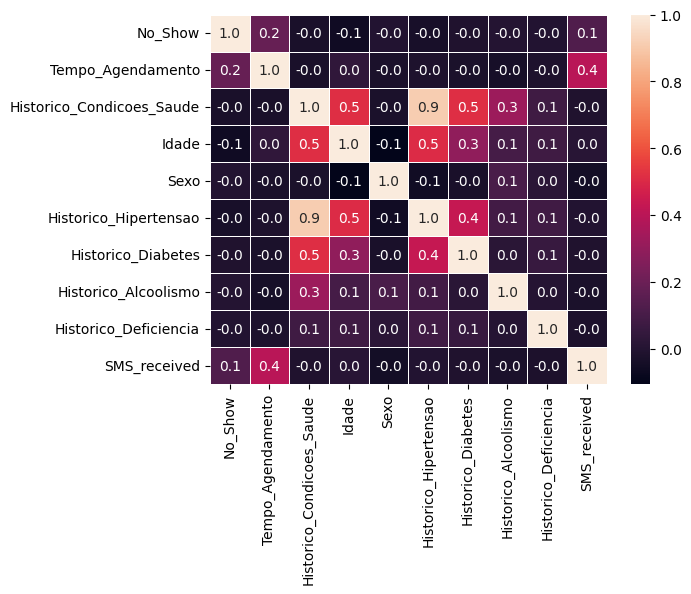

In [ ]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot